## Importacion del cvs

In [256]:
import pandas as pd

df = pd.read_csv("academica2.csv")

df.head()

,Horas_Trabaja,Becario,carrera,semestre,promedio,Personas_Cargo,Genero,Edad
0,0,Sí,Gestión de empresas,4,3.0,No,Femenino,21
1,24,Sí,ing informatica,5,3.2,No,Masculino,21
2,0,No,Construcciones civiles,4,3.6,Sí,Femenino,24
3,48,No,Ingeniería informática,2,3.8,No,Masculino,21
4,0,Sí,Tecnología en química industrial y de laborato...,2,3.8,No,Femenino,20


In [257]:

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#Dividimos las poblaciones en 4 posibles grupos de estudiantes

df_P1 = df[(df["Becario"]=="Sí") & (df["Personas_Cargo"]=="Sí")]
df_P2 = df[(df["Becario"]=="Sí") & (df["Personas_Cargo"]=="No")]
df_P3 = df[(df["Becario"]=="No") & (df["Personas_Cargo"]=="No")]
df_P4 = df[(df["Becario"]=="No") & (df["Personas_Cargo"]=="Sí")]


### Descripcion de los datos

#### Grupo 2

In [258]:
df_P2.describe()

,Horas_Trabaja,semestre,promedio,Edad
count,26.000000,26.000000,26.000000,26.000000
mean,6.730769,4.115385,4.007692,20.307692
std,13.952943,1.751044,0.419450,2.186673
min,0.000000,1.000000,3.000000,17.000000
25%,0.000000,3.250000,3.825000,19.000000
50%,0.000000,4.000000,4.000000,20.000000
75%,0.000000,6.000000,4.200000,21.000000
max,48.000000,6.000000,4.700000,26.000000


#### Grupo 3

In [259]:
df_P3.describe()

,Horas_Trabaja,semestre,promedio,Edad
count,70.000000,70.000000,70.000000,70.000000
mean,14.342857,4.014286,4.128571,21.700000
std,19.309745,2.129795,0.371890,3.329055
min,0.000000,1.000000,3.200000,17.000000
25%,0.000000,2.000000,3.900000,19.250000
50%,3.000000,4.000000,4.100000,21.000000
75%,23.500000,5.000000,4.400000,23.000000
max,66.000000,10.000000,4.800000,36.000000


#### Grupo 4

In [260]:
df_P4.describe()

,Horas_Trabaja,semestre,promedio,Edad
count,8.000000,8.000000,8.000000,8.000000
mean,35.500000,4.750000,3.850000,31.750000
std,19.265068,2.052873,0.450397,7.629829
min,0.000000,2.000000,3.200000,23.000000
25%,32.500000,4.000000,3.675000,24.000000
50%,45.000000,4.000000,3.700000,32.500000
75%,48.000000,5.250000,4.025000,37.500000
max,48.000000,9.000000,4.600000,42.000000


# Estudiamos la relacion entre Estudiar/Trabajar y ser becario

## Grupo 2 Becarios sin personas a cargo
Iniciaremos con el grupo 2, ya que no hay datos suficientes para dar una relación entre estudiantes becarios y con personas a cargo

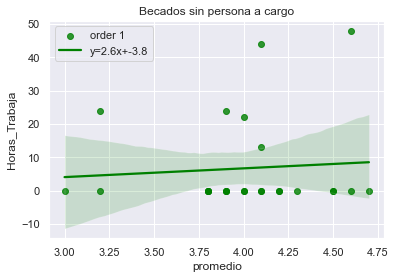

In [261]:
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(df_P2["promedio"],df_P2["Horas_Trabaja"])

sns.regplot(data=df_P2,x=df_P2["promedio"],y=df_P2["Horas_Trabaja"],scatter=True,color="green",order=1,label='order 1',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(pendiente,intercepto)})
plt.title("Becados sin persona a cargo")
plt.legend()

## Grupo3  NO Becarios & sin Personas a cargo

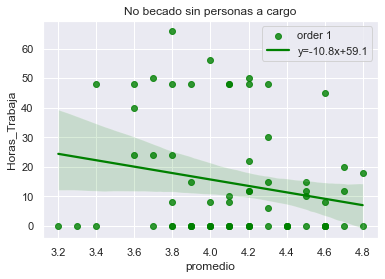

In [262]:
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(df_P3["promedio"],df_P3["Horas_Trabaja"])

sns.regplot(data=df_P3,x=df_P3["promedio"],y=df_P3["Horas_Trabaja"],scatter=True,color="green",order=1,label='order 1',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(pendiente,intercepto)})
plt.title("No becado sin personas a cargo")
plt.legend()


## Grupo 4 No becarios con personas a cargo

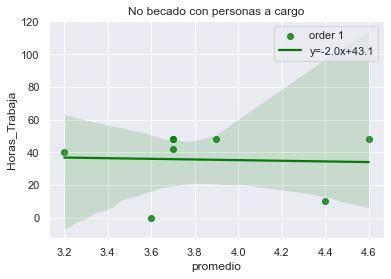

In [263]:
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(df_P4["promedio"],df_P4["Horas_Trabaja"])

sns.regplot(data=df_P4,x=df_P4["promedio"],y=df_P4["Horas_Trabaja"],scatter=True,color="green",order=1,label='order 1',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(pendiente,intercepto)})
plt.title("No becado con personas a cargo")
plt.legend()

## Podemos establecer intervalos de confianzar para nuestros 3 grupos principales

Haremos una comparativa y subdividiremos nuestras dos poblaciones de estudio y compararemos su comportamiento con respecto a sus promedios y el semestre que cursa, los subdividiremos en grupos tales que "NoTrabaja" "TrabajaMedioTiempo" "TrabajaFullTime" 

## Grupo 2 Becarios sin personas a su cargo

In [264]:
df_Notrabaja = df_P2[df_P2["Horas_Trabaja"]==0]
df_Midtrabaja = df_P2[(df_P2["Horas_Trabaja"]>0) & (df_P2["Horas_Trabaja"]<=24)]
df_Fulltrabaja = df_P2[(df_P2["Horas_Trabaja"]>24)]

df_Fulltrabaja.head()

,Horas_Trabaja,Becario,carrera,semestre,promedio,Personas_Cargo,Genero,Edad
12,44,Sí,Comunicación Audiovisual,6,4.1,No,Femenino,23
96,48,Sí,Comunicación,4,4.6,No,Femenino,19


In [265]:
from cmath import sqrt
import math
def Intervalo_de_confianza(std,n,mean):
    confianza = 0.95
    t = std /math.sqrt(n) * stats.t.ppf((1+confianza)/2, n-1)
    Q1 = (mean+t)
    Q2 = (mean-t)
    return "Su intervalo de confianza es:({0:.1f},{1:.1f}) ".format(Q2,Q1)

Intervalo_Notrabaja = Intervalo_de_confianza(df_Notrabaja["promedio"].std(),len(df_Notrabaja),df_Notrabaja["promedio"].mean())
Intervalo_Midtrabaja = Intervalo_de_confianza(df_Midtrabaja["promedio"].std(),len(df_Midtrabaja),df_Midtrabaja["promedio"].mean())
Intervalo_fullTrabaja = Intervalo_de_confianza(df_Fulltrabaja["promedio"].std(),len(df_Fulltrabaja),df_Fulltrabaja["promedio"].mean())

print("Intervalo no trabajan: "+Intervalo_Notrabaja)
print("Intervalo trabajan medio tiempo: "+Intervalo_Midtrabaja)
print("Intervalo trabajan full time: "+Intervalo_fullTrabaja)

Intervalo no trabajan: Su intervalo de confianza es:(3.8,4.2) 
Intervalo trabajan medio tiempo: Su intervalo de confianza es:(3.2,4.4) 
Intervalo trabajan full time: Su intervalo de confianza es:(1.2,7.5) 


### Grupo 3 No becados y sin personas a su cargo

In [266]:
df_Notrabaja = df_P3[df_P3["Horas_Trabaja"]==0]
df_Midtrabaja = df_P3[(df_P3["Horas_Trabaja"]>0) & (df_P3["Horas_Trabaja"]<=24)]
df_Fulltrabaja = df_P3[(df_P3["Horas_Trabaja"]>24)]

Intervalo_Notrabaja = Intervalo_de_confianza(df_Notrabaja["promedio"].std(),len(df_Notrabaja),df_Notrabaja["promedio"].mean())
Intervalo_Midtrabaja = Intervalo_de_confianza(df_Midtrabaja["promedio"].std(),len(df_Midtrabaja),df_Midtrabaja["promedio"].mean())
Intervalo_fullTrabaja = Intervalo_de_confianza(df_Fulltrabaja["promedio"].std(),len(df_Fulltrabaja),df_Fulltrabaja["promedio"].mean())

print("Intervalo no trabajan: "+Intervalo_Notrabaja)
print("Intervalo trabajan medio tiempo: "+Intervalo_Midtrabaja)
print("Intervalo trabajan full time: "+Intervalo_fullTrabaja)

Intervalo no trabajan: Su intervalo de confianza es:(4.0,4.3) 
Intervalo trabajan medio tiempo: Su intervalo de confianza es:(4.1,4.4) 
Intervalo trabajan full time: Su intervalo de confianza es:(3.8,4.2) 


### Grupo 4 No becados y con personas a cargo

In [267]:
df_Notrabaja = df_P4[df_P4["Horas_Trabaja"]==0]
df_Midtrabaja = df_P4[(df_P4["Horas_Trabaja"]>0) & (df_P4["Horas_Trabaja"]<=24)]
df_Fulltrabaja = df_P4[(df_P4["Horas_Trabaja"]>24)]

Intervalo_Notrabaja = Intervalo_de_confianza(df_Notrabaja["promedio"].std(),len(df_Notrabaja),df_Notrabaja["promedio"].mean())
Intervalo_Midtrabaja = Intervalo_de_confianza(df_Midtrabaja["promedio"].std(),len(df_Midtrabaja),df_Midtrabaja["promedio"].mean())
Intervalo_fullTrabaja = Intervalo_de_confianza(df_Fulltrabaja["promedio"].std(),len(df_Fulltrabaja),df_Fulltrabaja["promedio"].mean())

print("Intervalo no trabajan: "+Intervalo_Notrabaja)
print("Intervalo trabajan medio tiempo: "+Intervalo_Midtrabaja)
print("Intervalo trabajan full time: "+Intervalo_fullTrabaja)

Intervalo no trabajan: Su intervalo de confianza es:(nan,nan) 
Intervalo trabajan medio tiempo: Su intervalo de confianza es:(nan,nan) 
Intervalo trabajan full time: Su intervalo de confianza es:(3.3,4.3) 
